### Import Libaries

In [581]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFECV

pd.set_option('display.max_columns', 50)
%matplotlib inline

### Load In Two Datasets

In [582]:
df = pd.read_csv('/Users/arencarpenter/Desktop/chsi_dataset/RISKFACTORSANDACCESSTOCARE.csv', na_values=['-1111.1', '-2222', '-2222.2'])
df_rural_urban = pd.read_csv('/Users/arencarpenter/Desktop/PctUrbanRural_County.csv')

## Processing

Primary Care Physician Rate and Dentist Rate are per 100k population

In [583]:
df.Community_Health_Center_Ind = df.Community_Health_Center_Ind - 1
df.HPSA_Ind = df.HPSA_Ind - 1

In [584]:
df = pd.concat([df, df_rural_urban], axis=1)

In [585]:
df.head(20)

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,CI_Min_Fruit_Veg,CI_Max_Fruit_Veg,Obesity,CI_Min_Obesity,CI_Max_Obesity,High_Blood_Pres,CI_Min_High_Blood_Pres,CI_Max_High_Blood_Pres,Smoker,CI_Min_Smoker,CI_Max_Smoker,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind,STATE,COUNTY,STATENAME,COUNTYNAME,POP_COU,POP_URBAN,POPPCT_URBAN,AREA_URBAN,AREAPCT_URBAN,POPDEN_URBAN,POP_RURAL,POPPCT_RURAL,AREA_RURAL,AREAPCT_RURAL,POPDEN_RURAL
0,1.0,1.0,Autauga,Alabama,AL,29.0,27.8,20.7,34.9,78.6,69.4,87.8,24.5,17.3,31.7,29.1,19.2,39.0,26.6,19.1,34.0,14.2,9.1,19.3,5690.0,4762.0,1209.0,45.3,22.6,0.0,1.0,1,1,Alabama,Autauga,54571,31650,58.00,50882539,3.30,1611.0,22921,42.00,1.488700e+09,96.70,39.9
1,1.0,3.0,Baldwin,Alabama,AL,16.0,27.2,23.2,31.2,76.2,71.2,81.3,23.6,19.5,27.6,30.5,24.5,36.6,24.6,20.3,28.8,7.2,5.2,9.3,19798.0,22635.0,3839.0,67.0,30.8,0.0,1.0,1,3,Alabama,Baldwin,182265,105205,57.72,275001368,6.68,990.8,77060,42.28,3.842520e+09,93.32,51.9
2,1.0,5.0,Barbour,Alabama,AL,51.0,NaN,NaN,NaN,NaN,NaN,NaN,25.6,16.2,35.0,NaN,NaN,NaN,17.7,10.2,25.1,6.6,2.0,11.3,5126.0,3288.0,1092.0,45.8,24.6,0.0,1.0,1,5,Alabama,Barbour,27457,8844,32.21,17447656,0.76,1312.8,18613,67.79,2.274371e+09,99.24,21.2
3,1.0,7.0,Bibb,Alabama,AL,42.0,NaN,NaN,NaN,86.6,77.8,95.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.1,4.7,21.5,3315.0,2390.0,974.0,41.8,18.6,0.0,0.0,1,7,Alabama,Bibb,22915,7252,31.65,18903236,1.17,993.6,15663,68.35,1.593578e+09,98.83,25.5
4,1.0,9.0,Blount,Alabama,AL,28.0,33.5,26.3,40.6,74.6,66.1,83.0,24.2,17.2,31.2,NaN,NaN,NaN,23.6,16.7,30.4,8.4,4.4,12.4,8131.0,5019.0,1300.0,16.2,10.8,1.0,0.0,1,9,Alabama,Blount,57322,5760,10.05,10874700,0.65,1371.8,51562,89.95,1.659087e+09,99.35,80.5
5,1.0,11.0,Bullock,Alabama,AL,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2295.0,1433.0,504.0,54.3,18.1,0.0,0.0,1,11,Alabama,Bullock,10914,5307,48.63,12675709,0.79,1084.4,5607,51.37,1.600381e+09,99.21,9.1
6,1.0,13.0,Butler,Alabama,AL,76.0,24.5,15.5,33.5,NaN,NaN,NaN,22.0,13.0,31.0,NaN,NaN,NaN,27.3,17.6,37.0,9.5,4.4,14.6,4055.0,3150.0,952.0,43.3,19.3,0.0,1.0,1,13,Alabama,Butler,20947,6026,28.77,10503875,0.52,1485.9,14921,71.23,2.001473e+09,99.48,19.3
7,1.0,15.0,Calhoun,Alabama,AL,6.0,29.2,25.1,33.3,81.9,77.2,86.7,27.0,22.8,31.1,33.2,26.9,39.6,25.5,21.3,29.7,11.2,8.4,13.9,16456.0,16440.0,5301.0,75.8,41.9,0.0,1.0,1,15,Alabama,Calhoun,118572,78617,66.30,210145581,13.39,968.9,39955,33.70,1.359044e+09,86.61,76.1
8,1.0,17.0,Chambers,Alabama,AL,50.0,34.7,25.3,44.0,84.6,75.4,93.7,NaN,NaN,NaN,NaN,NaN,NaN,11.7,6.2,17.1,17.1,10.2,24.1,5533.0,5473.0,1497.0,53.6,22.6,0.0,1.0,1,17,Alabama,Chambers,34215,17399,50.85,54790707,3.55,822.5,16816,49.15,1.490219e+09,96.45,29.2
9,1.0,19.0,Cherokee,Alabama,AL,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.6,14.2,33.0,13.3,6.8,19.8,3583.0,3086.0,854.0,28.5,12.2,1.0,0.0,1,19,Alabama,Cherokee,25989,3707,14.26,26419773,1.84,363.4,22282,85.74,1.407656e+09,98.16,41.0


In [586]:
df.drop(columns=['CI_Min_No_Exercise', 'CI_Max_No_Exercise', 'CI_Min_Fruit_Veg', 'CI_Max_Fruit_Veg', 'CI_Min_Obesity', 
               'CI_Max_Obesity', 'CI_Min_High_Blood_Pres', 'CI_Max_High_Blood_Pres', 'CI_Min_Smoker', 'CI_Max_Smoker',
               'CI_Min_Diabetes', 'CI_Max_Diabetes', 'STATE', 'COUNTY', 'STATENAME', 'COUNTYNAME', 'POPDEN_URBAN',
               'POPDEN_RURAL', 'County_FIPS_Code'], inplace=True)

In [587]:
df = df[df.State_FIPS_Code.notnull()] # Remove US territories from the list.

In [588]:
df.shape # We now have only the 3141 US counties.

(3141, 27)

In [589]:
df.head(20)

,State_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind,POP_COU,POP_URBAN,POPPCT_URBAN,AREA_URBAN,AREAPCT_URBAN,POP_RURAL,POPPCT_RURAL,AREA_RURAL,AREAPCT_RURAL
0,1.0,Autauga,Alabama,AL,29.0,27.8,78.6,24.5,29.1,26.6,14.2,5690.0,4762.0,1209.0,45.3,22.6,0.0,1.0,54571,31650,58.00,50882539,3.30,22921,42.00,1.488700e+09,96.70
1,1.0,Baldwin,Alabama,AL,16.0,27.2,76.2,23.6,30.5,24.6,7.2,19798.0,22635.0,3839.0,67.0,30.8,0.0,1.0,182265,105205,57.72,275001368,6.68,77060,42.28,3.842520e+09,93.32
2,1.0,Barbour,Alabama,AL,51.0,NaN,NaN,25.6,NaN,17.7,6.6,5126.0,3288.0,1092.0,45.8,24.6,0.0,1.0,27457,8844,32.21,17447656,0.76,18613,67.79,2.274371e+09,99.24
3,1.0,Bibb,Alabama,AL,42.0,NaN,86.6,NaN,NaN,NaN,13.1,3315.0,2390.0,974.0,41.8,18.6,0.0,0.0,22915,7252,31.65,18903236,1.17,15663,68.35,1.593578e+09,98.83
4,1.0,Blount,Alabama,AL,28.0,33.5,74.6,24.2,NaN,23.6,8.4,8131.0,5019.0,1300.0,16.2,10.8,1.0,0.0,57322,5760,10.05,10874700,0.65,51562,89.95,1.659087e+09,99.35
5,1.0,Bullock,Alabama,AL,75.0,NaN,NaN,NaN,NaN,NaN,NaN,2295.0,1433.0,504.0,54.3,18.1,0.0,0.0,10914,5307,48.63,12675709,0.79,5607,51.37,1.600381e+09,99.21
6,1.0,Butler,Alabama,AL,76.0,24.5,NaN,22.0,NaN,27.3,9.5,4055.0,3150.0,952.0,43.3,19.3,0.0,1.0,20947,6026,28.77,10503875,0.52,14921,71.23,2.001473e+09,99.48
7,1.0,Calhoun,Alabama,AL,6.0,29.2,81.9,27.0,33.2,25.5,11.2,16456.0,16440.0,5301.0,75.8,41.9,0.0,1.0,118572,78617,66.30,210145581,13.39,39955,33.70,1.359044e+09,86.61
8,1.0,Chambers,Alabama,AL,50.0,34.7,84.6,NaN,NaN,11.7,17.1,5533.0,5473.0,1497.0,53.6,22.6,0.0,1.0,34215,17399,50.85,54790707,3.55,16816,49.15,1.490219e+09,96.45
9,1.0,Cherokee,Alabama,AL,64.0,NaN,NaN,NaN,NaN,23.6,13.3,3583.0,3086.0,854.0,28.5,12.2,1.0,0.0,25989,3707,14.26,26419773,1.84,22282,85.74,1.407656e+09,98.16


In [590]:
df.isnull().sum()

State_FIPS_Code                   0
CHSI_County_Name                  0
CHSI_State_Name                   0
CHSI_State_Abbr                   0
Strata_ID_Number                  0
No_Exercise                     935
Few_Fruit_Veg                  1237
Obesity                         917
High_Blood_Pres                1619
Smoker                          874
Diabetes                        422
Uninsured                         3
Elderly_Medicare                 31
Disabled_Medicare                32
Prim_Care_Phys_Rate               0
Dentist_Rate                      1
Community_Health_Center_Ind       0
HPSA_Ind                          0
POP_COU                           0
POP_URBAN                         0
POPPCT_URBAN                      0
AREA_URBAN                        0
AREAPCT_URBAN                     0
POP_RURAL                         0
POPPCT_RURAL                      0
AREA_RURAL                        0
AREAPCT_RURAL                     0
dtype: int64

### Imputing Missing Community Indicators

Using the state average for each missing indicator. I looked at histograms for the CHSI values and they were normally distributed, so I used the mean to impute.

In [591]:
def impute_state_avg(column, state):
    state_avg = df[df.CHSI_State_Name == state][column].mean()
    print(state + " State Avg for " + column + ": " + str(state_avg))

    df[column] = df[column].fillna(state_avg)

In [592]:
states = df.CHSI_State_Name.unique()
columns = ['No_Exercise','Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes', 'Elderly_Medicare', 
           'Disabled_Medicare', 'Dentist_Rate']

In [593]:
def impute():
    for column in columns:
        for state in states:
            impute_state_avg(column, state)

In [594]:
impute()

Alabama State Avg for No_Exercise: 29.794999999999995
Alaska State Avg for No_Exercise: 29.794999999999987
Arizona State Avg for No_Exercise: 25.652999999999995
Arkansas State Avg for No_Exercise: 31.0486
California State Avg for No_Exercise: 24.272413793103446
Colorado State Avg for No_Exercise: 24.02242187500001
Connecticut State Avg for No_Exercise: 20.9375
Delaware State Avg for No_Exercise: 25.933333333333334
District of Columbia State Avg for No_Exercise: 22.2
Florida State Avg for No_Exercise: 27.122835820895528
Georgia State Avg for No_Exercise: 28.849905660377388
Hawaii State Avg for No_Exercise: 21.238999999999997
Idaho State Avg for No_Exercise: 22.9475
Illinois State Avg for No_Exercise: 27.300196078431398
Indiana State Avg for No_Exercise: 27.686304347826102
Iowa State Avg for No_Exercise: 25.966868686868693
Kansas State Avg for No_Exercise: 28.326809523809548
Kentucky State Avg for No_Exercise: 34.45500000000002
Louisiana State Avg for No_Exercise: 34.683671875000016
Main

Georgia State Avg for High_Blood_Pres: 30.055345911949694
Hawaii State Avg for High_Blood_Pres: 25.4
Idaho State Avg for High_Blood_Pres: 26.859090909090913
Illinois State Avg for High_Blood_Pres: 29.245098039215645
Indiana State Avg for High_Blood_Pres: 28.508695652173895
Iowa State Avg for High_Blood_Pres: 26.391919191919175
Kansas State Avg for High_Blood_Pres: 29.44571428571425
Kentucky State Avg for High_Blood_Pres: 31.00333333333331
Louisiana State Avg for High_Blood_Pres: 30.367187499999986
Maine State Avg for High_Blood_Pres: 24.79375
Maryland State Avg for High_Blood_Pres: 27.82083333333333
Massachusetts State Avg for High_Blood_Pres: 25.664285714285715
Michigan State Avg for High_Blood_Pres: 29.1180722891566
Minnesota State Avg for High_Blood_Pres: 28.118390804597674
Mississippi State Avg for High_Blood_Pres: 31.667073170731687
Missouri State Avg for High_Blood_Pres: 30.210434782608655
Montana State Avg for High_Blood_Pres: 27.703571428571415
Nebraska State Avg for High_Blood

Massachusetts State Avg for Elderly_Medicare: 58704.57142857143
Michigan State Avg for Elderly_Medicare: 14669.819277108434
Minnesota State Avg for Elderly_Medicare: 6834.045977011494
Mississippi State Avg for Elderly_Medicare: 4091.609756097561
Missouri State Avg for Elderly_Medicare: 6437.55652173913
Montana State Avg for Elderly_Medicare: 2338.325959488273
Nebraska State Avg for Elderly_Medicare: 3248.2826191622535
Nevada State Avg for Elderly_Medicare: 13906.058823529413
New Hampshire State Avg for Elderly_Medicare: 15196.7
New Jersey State Avg for Elderly_Medicare: 51087.09523809524
New Mexico State Avg for Elderly_Medicare: 6393.272727272727
New York State Avg for Elderly_Medicare: 38072.91935483871
North Carolina State Avg for Elderly_Medicare: 9802.08
North Dakota State Avg for Elderly_Medicare: 2206.3728527175444
Ohio State Avg for Elderly_Medicare: 16886.840909090908
Oklahoma State Avg for Elderly_Medicare: 5742.194805194805
Oregon State Avg for Elderly_Medicare: 12372.5
Penn

In [595]:
df.isnull().sum() # Now just missing 3 values for uninsured, our target, so dropping those.

State_FIPS_Code                0
CHSI_County_Name               0
CHSI_State_Name                0
CHSI_State_Abbr                0
Strata_ID_Number               0
No_Exercise                    0
Few_Fruit_Veg                  0
Obesity                        0
High_Blood_Pres                0
Smoker                         0
Diabetes                       0
Uninsured                      3
Elderly_Medicare               0
Disabled_Medicare              0
Prim_Care_Phys_Rate            0
Dentist_Rate                   0
Community_Health_Center_Ind    0
HPSA_Ind                       0
POP_COU                        0
POP_URBAN                      0
POPPCT_URBAN                   0
AREA_URBAN                     0
AREAPCT_URBAN                  0
POP_RURAL                      0
POPPCT_RURAL                   0
AREA_RURAL                     0
AREAPCT_RURAL                  0
dtype: int64

### Dropping Missing Values from Target Variable

In [596]:
df[df.Uninsured.isnull()]

,State_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind,POP_COU,POP_URBAN,POPPCT_URBAN,AREA_URBAN,AREAPCT_URBAN,POP_RURAL,POPPCT_RURAL,AREA_RURAL,AREAPCT_RURAL
249,8.0,Broomfield,Colorado,CO,27.0,14.400,80.08,21.500000,15.9,17.400000,3.300000,NaN,8486.253731,2246.58209,87.4,23.977612,1.0,1.0,6499,4032,62.04,3651419,0.09,2467,37.96,3.914641e+09,99.91
317,11.0,Washington,District of Columbia,DC,3.0,22.200,68.10,21.300000,26.7,20.400000,7.800000,NaN,63403.000000,10262.00000,227.6,102.800000,0.0,1.0,538479,513696,95.40,543209334,49.20,24783,4.60,5.608655e+08,50.80
546,15.0,Kalawao,Hawaii,HI,37.0,29.795,80.08,26.897561,31.6,23.822917,9.651563,NaN,8486.253731,2246.58209,0.0,0.000000,1.0,1.0,185079,114766,62.01,224652200,2.15,70313,37.99,1.020890e+10,97.85


In [597]:
df.shape

(3141, 27)

In [598]:
df = df.dropna()

In [599]:
df.shape

(3138, 27)

## Removing Correlated Features

In [600]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

['Disabled_Medicare', 'POP_URBAN', 'POPPCT_RURAL', 'AREAPCT_RURAL']


In [601]:
df.shape

(3138, 23)

## Feature Engineering

In [602]:
df['Percent_Uninsured'] = round(df.Uninsured / df.POP_COU * 100, 3)

In [603]:
df['CHC_x_POPPCT_URBAN'] = df.Community_Health_Center_Ind * df.POPPCT_URBAN

In [604]:
df['HPSA_x_POPPCT_URBAN'] = df.HPSA_Ind * df.POPPCT_URBAN

In [605]:
df = df[df.Percent_Uninsured <= 100]

In [606]:
df_sm = df

## Starting to Model

In [607]:
target = df.Percent_Uninsured

In [608]:
df = df.drop(columns=['Uninsured', 'Percent_Uninsured']) # Remove our target variables.

In [609]:
continuous_variables = ['No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes', 
                        'Elderly_Medicare', 'Prim_Care_Phys_Rate', 'Dentist_Rate', 'POP_COU', 'POPPCT_URBAN',
                        'AREA_URBAN', 'AREAPCT_URBAN', 'POP_RURAL', 'AREA_RURAL', 'CHC_x_POPPCT_URBAN', 
                        'HPSA_x_POPPCT_URBAN']
categorical_variables = ['Community_Health_Center_Ind', 'HPSA_Ind']

df_cont = df[continuous_variables]
df_cate = df[categorical_variables]

In [610]:
df_features = pd.concat([df_cont, df_cate], axis=1)

### Train Test Split

In [611]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=9)

In [612]:
print("X_train Shape: " + str(X_train.shape))
print("X_test Shape:  " + str(X_test.shape))
print("y_train Shape: " + str(y_train.shape))
print("y_test Shape:  " + str(y_test.shape))

X_train Shape: (2121, 19)
X_test Shape:  (708, 19)
y_train Shape: (2121,)
y_test Shape:  (708,)


### Dummy Baseline

In [613]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)

dummy_regr.predict(X_train)

dummy_regr.score(X_train, y_train)

0.0

### Baseline Model - No Transformations

In [614]:
#instantiate a linear regression object
model = linear_model.LinearRegression()

#fit the linear regression to the data
model = model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training RMSE:' , train_rmse)
print ("R^2 Score:", model.score(X_train, y_train))

Training RMSE: 16.514121936709007
R^2 Score: 0.3860374774869557


In [615]:
tuple(zip(df_features.columns, model.coef_))

(('No_Exercise', -0.05758707563551903),
 ('Few_Fruit_Veg', -0.03132725537284871),
 ('Obesity', 0.2342059915105504),
 ('High_Blood_Pres', -0.4669118881463597),
 ('Smoker', 0.35489099446625605),
 ('Diabetes', -0.16646124267803963),
 ('Elderly_Medicare', 0.0005096999622482048),
 ('Prim_Care_Phys_Rate', 0.05203229968792018),
 ('Dentist_Rate', 0.0006936491583211453),
 ('POP_COU', -4.256931102557262e-06),
 ('POPPCT_URBAN', -0.22429509653850252),
 ('AREA_URBAN', 4.794694594385023e-09),
 ('AREAPCT_URBAN', -0.12225185786631408),
 ('POP_RURAL', -0.0004282605559955467),
 ('AREA_RURAL', -8.145221789910201e-11),
 ('CHC_x_POPPCT_URBAN', 0.07719906160061368),
 ('HPSA_x_POPPCT_URBAN', -0.06316271519622785),
 ('Community_Health_Center_Ind', -9.293985820602769),
 ('HPSA_Ind', 5.6506290689785725))

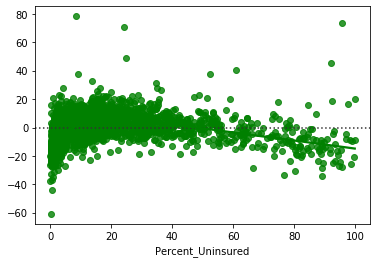

In [616]:
sns.residplot(y_train, y_train_pred,lowess=True, color="g")

### Model - Transformed

In [617]:
continuous_variables = ['No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes', 
                        'Elderly_Medicare', 'Prim_Care_Phys_Rate', 'Dentist_Rate', 'POP_COU', 'POPPCT_URBAN',
                        'AREA_URBAN', 'AREAPCT_URBAN', 'POP_RURAL', 'AREA_RURAL', 'CHC_x_POPPCT_URBAN', 
                        'HPSA_x_POPPCT_URBAN']
categorical_variables = ['Community_Health_Center_Ind', 'HPSA_Ind']

df_cont = df[continuous_variables]
df_cate = df[categorical_variables]

In [618]:
#Scaling our continuous variables:
scaler = StandardScaler()
scaled_df_cont = pd.DataFrame(scaler.fit_transform(df_cont), columns = continuous_variables)
scaled_df_cont.head()

,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Elderly_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,POP_COU,POPPCT_URBAN,AREA_URBAN,AREAPCT_URBAN,POP_RURAL,AREA_RURAL,CHC_x_POPPCT_URBAN,HPSA_x_POPPCT_URBAN
0,0.001693,-0.236255,-0.146181,-0.081949,0.644323,2.262954,-0.173686,-0.214827,-0.387413,-0.160412,0.471435,-0.198346,-0.247414,0.169285,-0.173965,-0.755370,0.753582
1,-0.103002,-0.835826,-0.356444,0.236848,0.231885,-0.357520,0.938296,0.277066,-0.004376,0.228596,0.462483,0.788291,-0.054477,3.387968,0.176380,-0.755370,0.745133
2,0.349806,0.133480,0.110807,0.487331,-1.191025,-0.582132,-0.265392,-0.203493,-0.293989,-0.243012,-0.353052,-0.345536,-0.392402,-0.086835,-0.057025,-0.755370,-0.024632
3,0.349806,1.762314,0.413950,0.487331,0.071636,1.851165,-0.321262,-0.294165,-0.574260,-0.256849,-0.370955,-0.339128,-0.368998,-0.262219,-0.158355,-0.755370,-0.996570
4,0.996300,-1.235540,-0.216269,0.487331,0.025666,0.091704,-0.157697,-0.874463,-0.938613,-0.152031,-1.061491,-0.374472,-0.398681,1.872056,-0.148605,-0.429805,-0.996570


In [622]:
df_total = pd.concat([scaled_df_cont, df_cate], axis=1)

In [628]:
df_total = df_total.fillna(0.0)
df_total = df_total.iloc[:2829]

In [629]:
X_train, X_test, y_train, y_test = train_test_split(df_total, target, random_state=7)

In [630]:
print("X_train Shape: " + str(X_train.shape))
print("X_test Shape:  " + str(X_test.shape))
print("y_train Shape: " + str(y_train.shape))
print("y_test Shape:  " + str(y_test.shape))

X_train Shape: (2121, 19)
X_test Shape:  (708, 19)
y_train Shape: (2121,)
y_test Shape:  (708,)


In [631]:
#instantiate a linear regression object
model2 = linear_model.LinearRegression()

#fit the linear regression to the data
model2 = model2.fit(X_train, y_train)

y_train_pred = model2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training RMSE:' , train_rmse)
print ("R^2 Score:", model2.score(X_train, y_train))

Training RMSE: 16.799209277031405
R^2 Score: 0.37458465258109885


In [632]:
tuple(zip(df_features.columns, model2.coef_))

(('No_Exercise', 0.0008093966936231574),
 ('Few_Fruit_Veg', -0.4089271415638914),
 ('Obesity', 0.2976268148122872),
 ('High_Blood_Pres', -2.5644247579091886),
 ('Smoker', 1.7859479052767675),
 ('Diabetes', 0.28886196180578955),
 ('Elderly_Medicare', 7.848707613408392),
 ('Prim_Care_Phys_Rate', 2.4969234927048065),
 ('Dentist_Rate', 0.1860818545091813),
 ('POP_COU', -1.5603585333798649),
 ('POPPCT_URBAN', -6.724551451760801),
 ('AREA_URBAN', 1.493035186197612),
 ('AREAPCT_URBAN', -2.2830549750095415),
 ('POP_RURAL', -6.491471275899658),
 ('AREA_RURAL', -0.23703400456265503),
 ('CHC_x_POPPCT_URBAN', -1.5408747319136102),
 ('HPSA_x_POPPCT_URBAN', 0.28572309492265524),
 ('Community_Health_Center_Ind', 0.24906210820393274),
 ('HPSA_Ind', -1.1470200926523748))

### Recursive Feature Elimination

In [633]:
ols = linear_model.LinearRegression()

In [634]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



RFECV(cv=None,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [635]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]


In [636]:
list(removed_rfe)

['No_Exercise',
 'Few_Fruit_Veg',
 'Obesity',
 'Diabetes',
 'Dentist_Rate',
 'AREA_RURAL',
 'HPSA_x_POPPCT_URBAN',
 'Community_Health_Center_Ind']

In [637]:
list(selected_rfe)

['High_Blood_Pres',
 'Smoker',
 'Elderly_Medicare',
 'Prim_Care_Phys_Rate',
 'POP_COU',
 'POPPCT_URBAN',
 'AREA_URBAN',
 'AREAPCT_URBAN',
 'POP_RURAL',
 'CHC_x_POPPCT_URBAN',
 'HPSA_Ind']

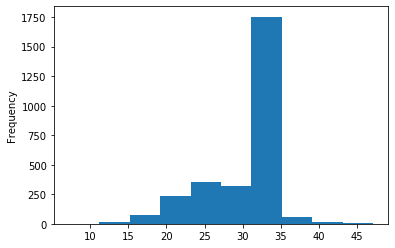

In [638]:
df.High_Blood_Pres.plot(kind='hist')

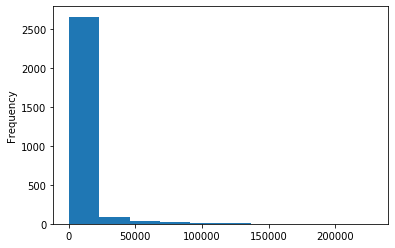

In [639]:
df.Elderly_Medicare.plot(kind='hist')

In [640]:
#instantiate a linear regression object
lm_rfe = linear_model.LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])

trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))
print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))
print('Testing Root Mean Squared Error:' , testRFE_rmse)
print ("R^2 Score:", lm_rfe.score(X_train[selected_rfe], y_train))

Training Root Mean Squared Error: 16.811669424692823
Testing Root Mean Squared Error: 16.467205559839403
R^2 Score: 0.37365655442620993


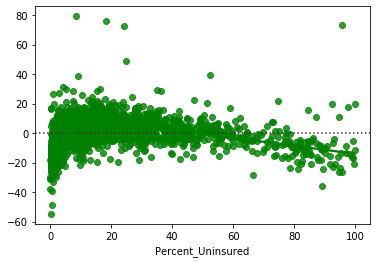

In [641]:
sns.residplot(y_train, y_rfe,lowess=True, color="g")

# Log Transform

After looking at the redis plot, we have some x-axis unbalance. Looking at hist plots for variables we see that they are skewed. So taking log tranformations could improve resid balance.

In [642]:
continuous_variables = ['High_Blood_Pres',
                        'Elderly_Medicare', 'POPPCT_URBAN',
                        'AREA_URBAN', 'POP_RURAL']
categorical_variables = ['Community_Health_Center_Ind', 'HPSA_Ind']

df_cont = df[continuous_variables]
df_cate = df[categorical_variables]

In [643]:
# #Scaling our continuous variables:
# scaler = StandardScaler()
# scaled_df_cont = pd.DataFrame(scaler.fit_transform(df_cont), columns = continuous_variables)
# scaled_df_cont.head()

In [644]:
df_total = pd.concat([df_cont, df_cate], axis=1)

In [645]:
df_total = df_total.fillna(0.01)
df_total = df_total.iloc[:3138]
df_total.shape

(2829, 7)

In [646]:
df_total

,High_Blood_Pres,Elderly_Medicare,POPPCT_URBAN,AREA_URBAN,POP_RURAL,Community_Health_Center_Ind,HPSA_Ind
0,29.1,4762.0,58.00,50882539,22921,0.0,1.0
1,30.5,22635.0,57.72,275001368,77060,0.0,1.0
2,31.6,3288.0,32.21,17447656,18613,0.0,1.0
3,31.6,2390.0,31.65,18903236,15663,0.0,0.0
4,31.6,5019.0,10.05,10874700,51562,1.0,0.0
...,...,...,...,...,...,...,...
3136,22.7,3260.0,64.52,33877054,10330,1.0,0.0
3137,18.9,1393.0,0.00,0,10247,1.0,1.0
3138,22.5,1431.0,89.08,48419066,4782,1.0,0.0
3139,27.8,1338.0,53.57,10557507,9887,0.0,0.0


In [647]:
df_total[df_total['AREA_URBAN'] == 0] = 0.01

In [648]:
df_total[df_total['POP_RURAL'] == 0] = 0.01

In [649]:
df_total[df_total['POPPCT_URBAN'] == 0] = 0.01

In [650]:
df_total['log_High_Blood_Pres'] = np.log(df_total['High_Blood_Pres'])
df_total['log_Elderly_Medicare'] = np.log(df_total['Elderly_Medicare'])
df_total['log_POPPCT_URBAN'] = np.log(df_total['POPPCT_URBAN'])
df_total['log_AREA_URBAN'] = np.log(df_total['AREA_URBAN'])
df_total['log_POP_RURAL'] = np.log(df_total['POP_RURAL'])

In [651]:
df_total

,High_Blood_Pres,Elderly_Medicare,POPPCT_URBAN,AREA_URBAN,POP_RURAL,Community_Health_Center_Ind,HPSA_Ind,log_High_Blood_Pres,log_Elderly_Medicare,log_POPPCT_URBAN,log_AREA_URBAN,log_POP_RURAL
0,29.10,4762.00,58.00,5.088254e+07,22921.00,0.00,1.00,3.370738,8.468423,4.060443,17.745030,10.039809
1,30.50,22635.00,57.72,2.750014e+08,77060.00,0.00,1.00,3.417727,10.027253,4.055604,19.432287,11.252340
2,31.60,3288.00,32.21,1.744766e+07,18613.00,0.00,1.00,3.453157,8.098035,3.472277,16.674716,9.831616
3,31.60,2390.00,31.65,1.890324e+07,15663.00,0.00,0.00,3.453157,7.779049,3.454738,16.754844,9.659057
4,31.60,5019.00,10.05,1.087470e+07,51562.00,1.00,0.00,3.453157,8.520986,2.307573,16.201950,10.850540
...,...,...,...,...,...,...,...,...,...,...,...,...
3136,22.70,3260.00,64.52,3.387705e+07,10330.00,1.00,0.00,3.122365,8.089482,4.166975,17.338248,9.242808
3137,0.01,0.01,0.01,1.000000e-02,0.01,0.01,0.01,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170
3138,22.50,1431.00,89.08,4.841907e+07,4782.00,1.00,0.00,3.113515,7.266129,4.489535,17.695404,8.472614
3139,27.80,1338.00,53.57,1.055751e+07,9887.00,0.00,0.00,3.325036,7.198931,3.980989,16.172348,9.198976


In [652]:
X_train, X_test, y_train, y_test = train_test_split(df_total, target, random_state=7)

In [653]:
print("X_train Shape: " + str(X_train.shape))
print("X_test Shape:  " + str(X_test.shape))
print("y_train Shape: " + str(y_train.shape))
print("y_test Shape:  " + str(y_test.shape))

X_train Shape: (2121, 12)
X_test Shape:  (708, 12)
y_train Shape: (2121,)
y_test Shape:  (708,)


In [654]:
#instantiate a linear regression object
model3 = linear_model.LinearRegression()

#fit the linear regression to the data
model3 = model3.fit(X_train, y_train)

y_train_pred = model3.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training RMSE:' , train_rmse)
print ("R^2 Score:", model3.score(X_train, y_train))

Training RMSE: 16.021155541178015
R^2 Score: 0.43117519415997596


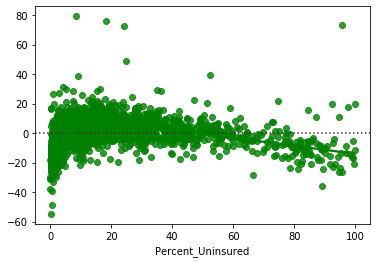

In [655]:
sns.residplot(y_train, y_rfe,lowess=True, color="g")

## EDA - Visualization

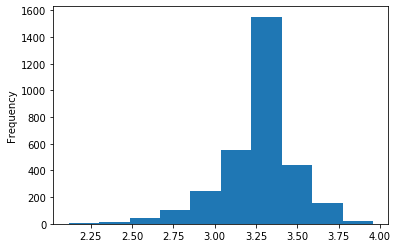

In [396]:
df.No_Exercise.plot(kind='hist')

In [397]:
df.No_Exercise = df.No_Exercise.apply(np.log)

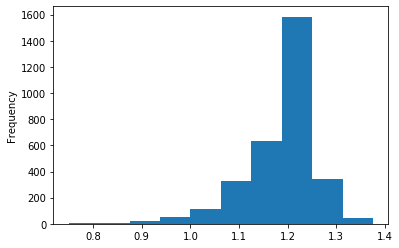

In [399]:
df.No_Exercise.plot(kind='hist')

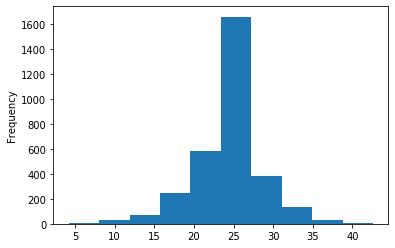

In [27]:
df.Obesity.plot(kind='hist')

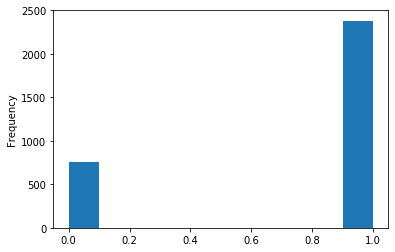

In [28]:
df.HPSA_Ind.plot(kind='hist')

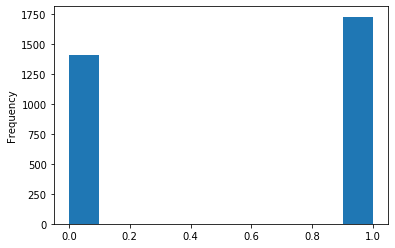

In [29]:
df.Community_Health_Center_Ind.plot(kind='hist')

# Using StatsModels

In [571]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [573]:
formula = 'Percent_Uninsured ~ No_Exercise + Few_Fruit_Veg + Obesity + High_Blood_Pres + Smoker + Diabetes + Elderly_Medicare \
+ Prim_Care_Phys_Rate + Dentist_Rate + POP_COU + POPPCT_URBAN + AREA_URBAN + AREAPCT_URBAN + POP_RURAL + AREA_RURAL \
+ CHC_x_POPPCT_URBAN + HPSA_x_POPPCT_URBAN + C(Community_Health_Center_Ind) + C(HPSA_Ind)'

In [575]:
model = ols(formula=formula, data=df_sm).fit()

In [576]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Percent_Uninsured   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     26.21
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           2.72e-86
Time:                        17:19:54   Log-Likelihood:                -24522.
No. Observations:                3138   AIC:                         4.908e+04
Df Residuals:                    3118   BIC:                         4.920e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               472.6660    246.339      1.919      0.055     -10.337     955.669
C(Community_Health_Center_Ind)[T.1.0]  -218.7786     36.519     -5.991      0.000    -290.383    -147.174
C(HPSA_Ind)[T.1.0]                      141.3123     41.759      3.384      0.001      59.434     223.190
No_Exercise                               1.2974      2.571      0.505      0.614      -3.745       6.339
Few_Fruit_Veg                             0.5191      3.070      0.169      0.866      -5.501       6.539
Obesity                                   1.8626      3.187      0.584      0.559      -4.386       8.111
High_Blood_Pres                          -9.1905      2.947     -3.119      0.002     -14.968      -3.413
Smoker                                   -3.0896      2.510     -1.231      0.218      -8.011       1.832
Diabetes                                 -2.6184      4.900     -0.534      0.593     -12.226       6.989
Elderly_Medicare                          0.0067      0.000     17.749      0.000       0.006       0.007
Prim_Care_Phys_Rate                      -0.1742      0.322     -0.542      0.588      -0.805       0.456
Dentist_Rate                             -0.7013      0.655     -1.071      0.284      -1.985       0.582
POP_COU                               -8.431e-05    7.4e-05     -1.139      0.255      -0.000    6.08e-05
POPPCT_URBAN                             -2.5605      0.838     -3.057      0.002      -4.203      -0.918
AREA_URBAN                             2.026e-07   1.25e-07      1.623      0.105   -4.21e-08    4.47e-07
AREAPCT_URBAN                            -0.0111      0.906     -0.012      0.990      -1.788       1.766
POP_RURAL                                -0.0044      0.001     -5.629      0.000      -0.006      -0.003
AREA_RURAL                             3.025e-10   1.16e-09      0.260      0.795   -1.98e-09    2.58e-09
CHC_x_POPPCT_URBAN                        3.9854      0.694      5.739      0.000       2.624       5.347
HPSA_x_POPPCT_URBAN                      -2.7196      0.802     -3.392      0.001      -4.292      -1.147
==============================================================================
Omnibus:                     7250.934   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47868526.329
Skew:                          22.226   Prob(JB):                         0.00
Kurtosis:                     606.433   Cond. No.                     2.24e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+11. This might indicate tha

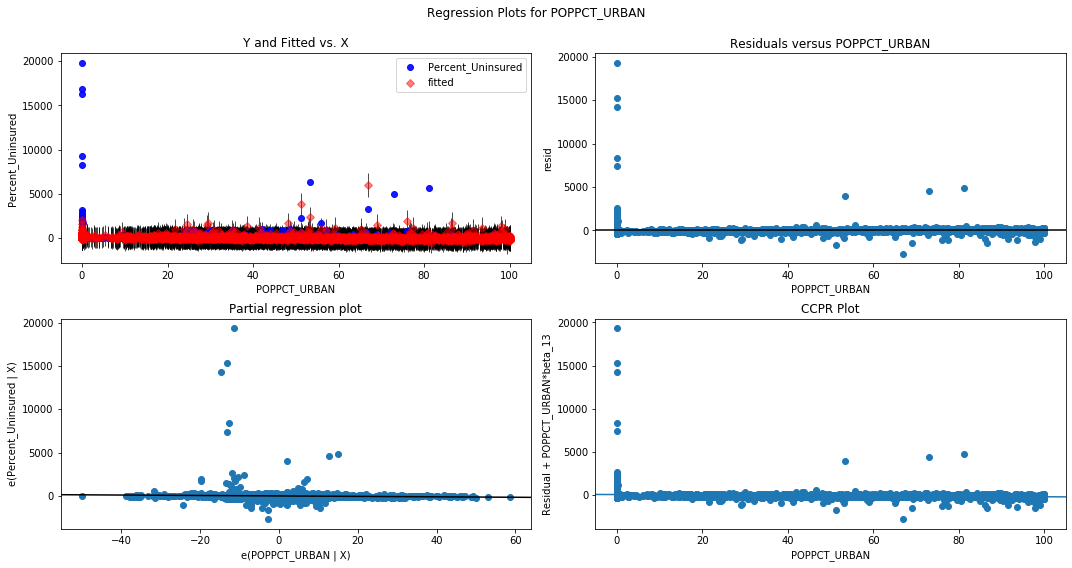

In [579]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "POPPCT_URBAN", fig=fig)
plt.show()